In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [12]:
# Define a simple Perceptron model
class Perceptron(nn.Module):
    def __init__(self, input_size, output_size=1, activation=nn.Identity()):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
        self.activation = activation

    def forward(self, x):
        return self.activation(self.fc(x))

model = Perceptron(input_size=2, output_size=2)

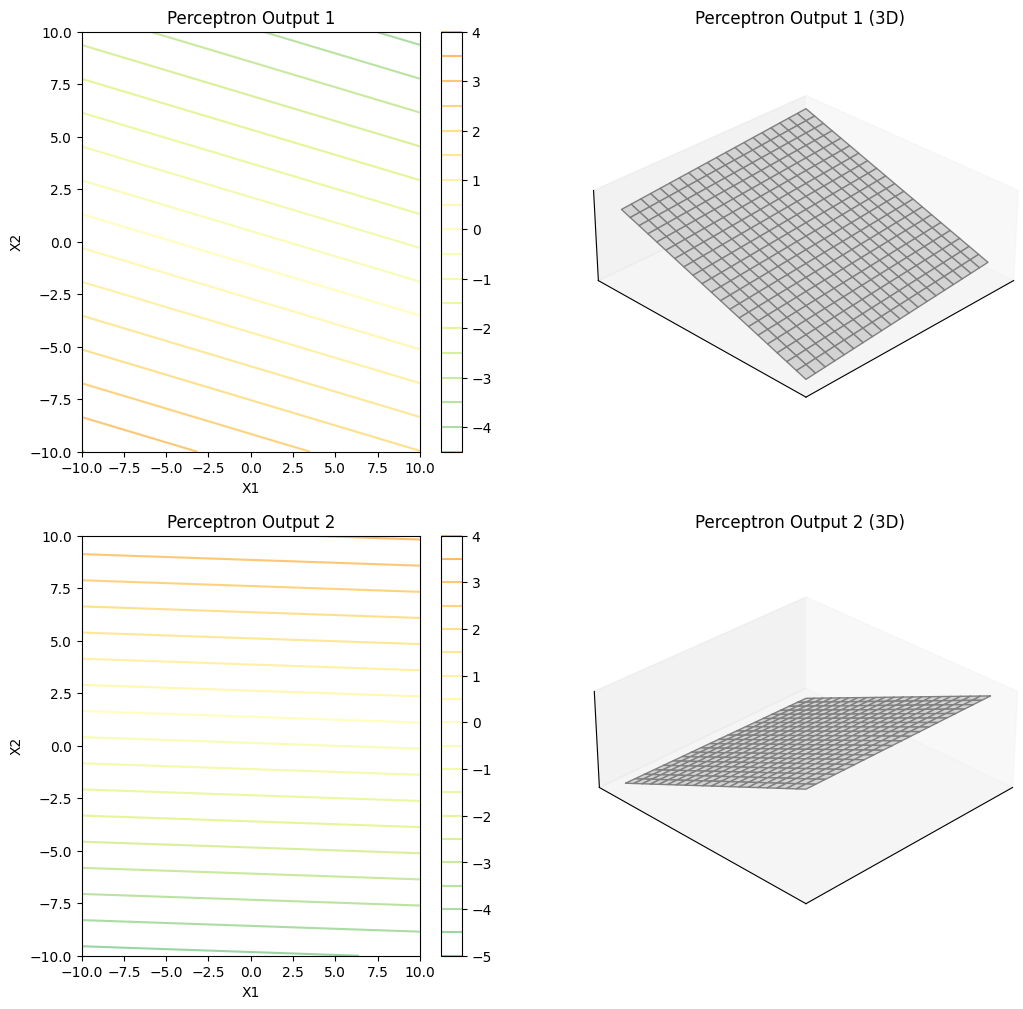

In [18]:
model.activation = nn.Identity()

x_min, x_max, y_min, y_max = -10, 10, -10, 10
v_min, v_max = -10, 10
grid_res = 1000
xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, grid_res), torch.linspace(y_min, y_max, grid_res))
grid = torch.stack([xx.ravel(), yy.ravel()]).T
with torch.no_grad():
    zz1 = model(grid)[:,0].reshape(xx.shape)
    zz2 = model(grid)[:,1].reshape(xx.shape)
    
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(221)
cont = ax.contour(xx, yy, zz1, cmap="Spectral_r", vmin=v_min, vmax=v_max, levels=16)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Perceptron Output 1')
plt.colorbar(cont, ax=ax)

ax = fig.add_subplot(222, projection='3d')
# surf = ax.plot_surface(xx, yy, zz1, linewidth=0, antialiased=False)
surf = ax.plot_surface(xx, yy, zz1, rstride=50, cstride=50, linewidth=1, edgecolor='gray', facecolor='lightgray')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Prediction')
ax.set_title('Perceptron Output 1 (3D)')
ax.view_init(elev=30, azim=45)
ax.set_aspect('equal')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax = fig.add_subplot(223)
cont = ax.contour(xx, yy, zz2, cmap="Spectral_r", vmin=v_min, vmax=v_max, levels=16)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Perceptron Output 2')
plt.colorbar(cont, ax=ax)

ax = fig.add_subplot(224, projection='3d')
# surf = ax.plot_surface(xx, yy, zz2, linewidth=0, antialiased=False)
surf = ax.plot_surface(xx, yy, zz2, rstride=50, cstride=50, linewidth=1, edgecolor='gray', facecolor='lightgray')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Prediction')
ax.set_title('Perceptron Output 2 (3D)')
ax.view_init(elev=30, azim=45)
ax.set_aspect('equal')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()


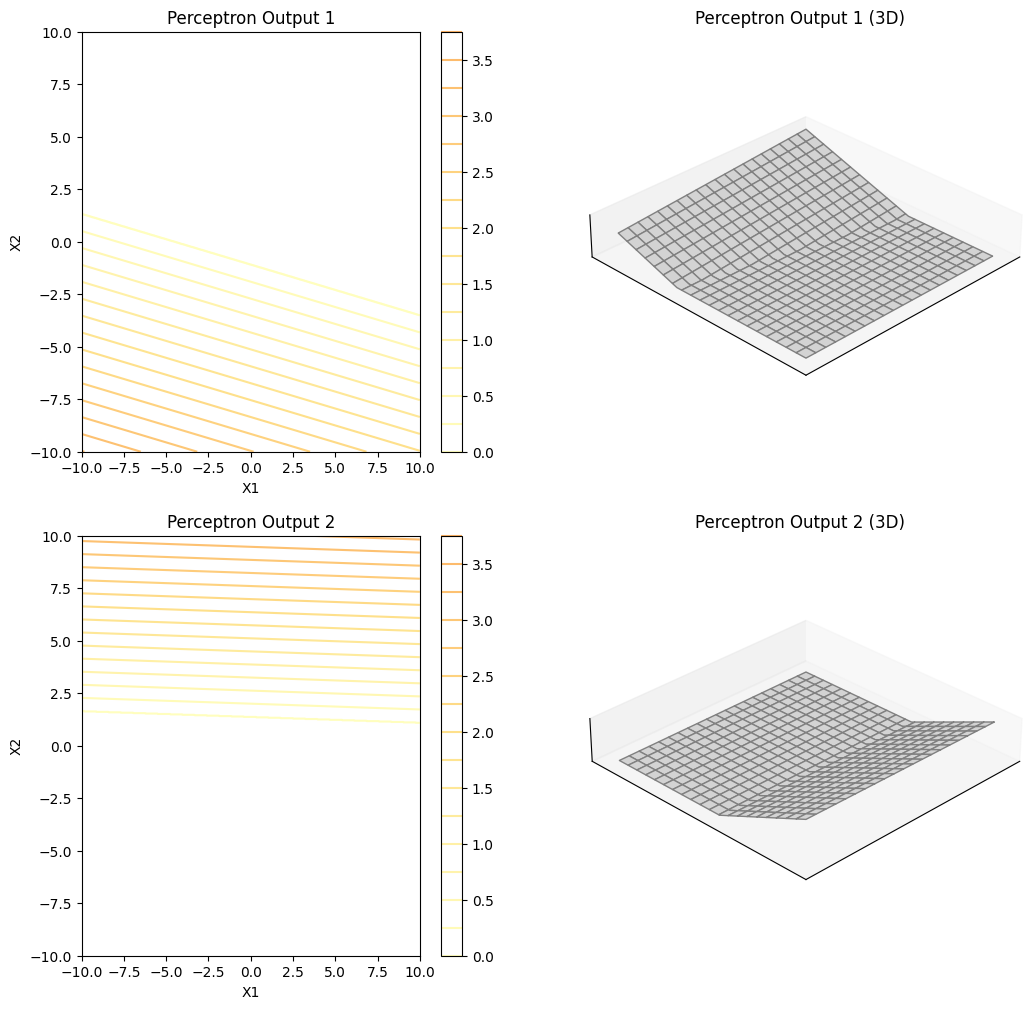

In [21]:
model.activation = nn.ReLU()

with torch.no_grad():
    zz1 = model(grid)[:,0].reshape(xx.shape)
    zz2 = model(grid)[:,1].reshape(xx.shape)
    
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(221)
cont = ax.contour(xx, yy, zz1, cmap="Spectral_r", vmin=v_min, vmax=v_max, levels=16)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Perceptron Output 1')
plt.colorbar(cont, ax=ax)

ax = fig.add_subplot(222, projection='3d')
# surf = ax.plot_surface(xx, yy, zz1, linewidth=0, antialiased=False)
surf = ax.plot_surface(xx, yy, zz1, rstride=50, cstride=50, linewidth=1, edgecolor='gray', facecolor='lightgray')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Prediction')
ax.set_title('Perceptron Output 1 (3D)')
ax.view_init(elev=30, azim=45)
ax.set_aspect('equal')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax = fig.add_subplot(223)
cont = ax.contour(xx, yy, zz2, cmap="Spectral_r", vmin=v_min, vmax=v_max, levels=16)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Perceptron Output 2')
plt.colorbar(cont, ax=ax)

ax = fig.add_subplot(224, projection='3d')
# surf = ax.plot_surface(xx, yy, zz2, linewidth=0, antialiased=False)
surf = ax.plot_surface(xx, yy, zz2, rstride=50, cstride=50, linewidth=1, edgecolor='gray', facecolor='lightgray')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Prediction')
ax.set_title('Perceptron Output 2 (3D)')
ax.view_init(elev=30, azim=45)
ax.set_aspect('equal')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()

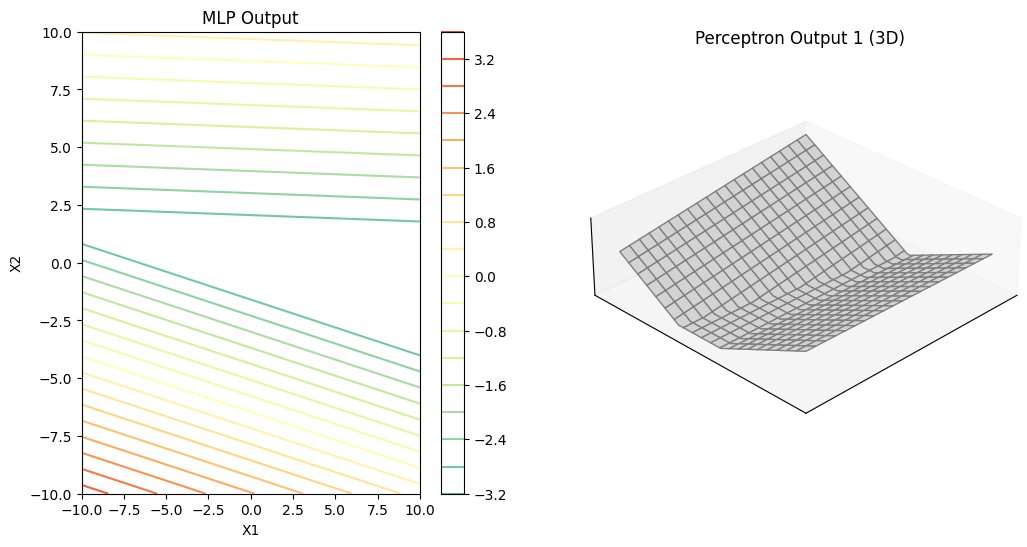

In [29]:
# additional_layer = Perceptron(input_size=2, output_size=1, activation = nn.Identity())

model.activation = nn.ReLU()

with torch.no_grad():
    h = model(grid)
    zz = additional_layer(h).reshape(xx.shape)*5
    
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
cont = ax.contour(xx, yy, zz, cmap="Spectral_r", vmin=-5, vmax=5, levels=16)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('MLP Output')
plt.colorbar(cont, ax=ax)

ax = fig.add_subplot(122, projection='3d')
surf = ax.plot_surface(xx, yy, zz, rstride=50, cstride=50, linewidth=1, edgecolor='gray', facecolor='lightgray')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Prediction')
ax.set_title('Perceptron Output 1 (3D)')
ax.view_init(elev=30, azim=45)
ax.set_aspect('equal')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()